# Question

#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# importing dataset

data=pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## Performing EDA & Visualization on dataset

In [3]:
# Geting Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
# Descriptive Satistics

data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
correlation=data.corr()
correlation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

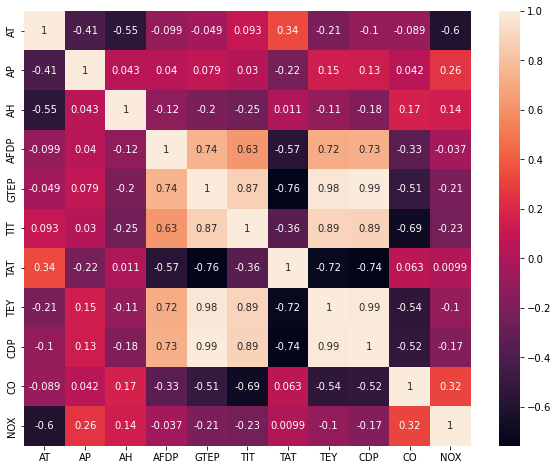

In [7]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

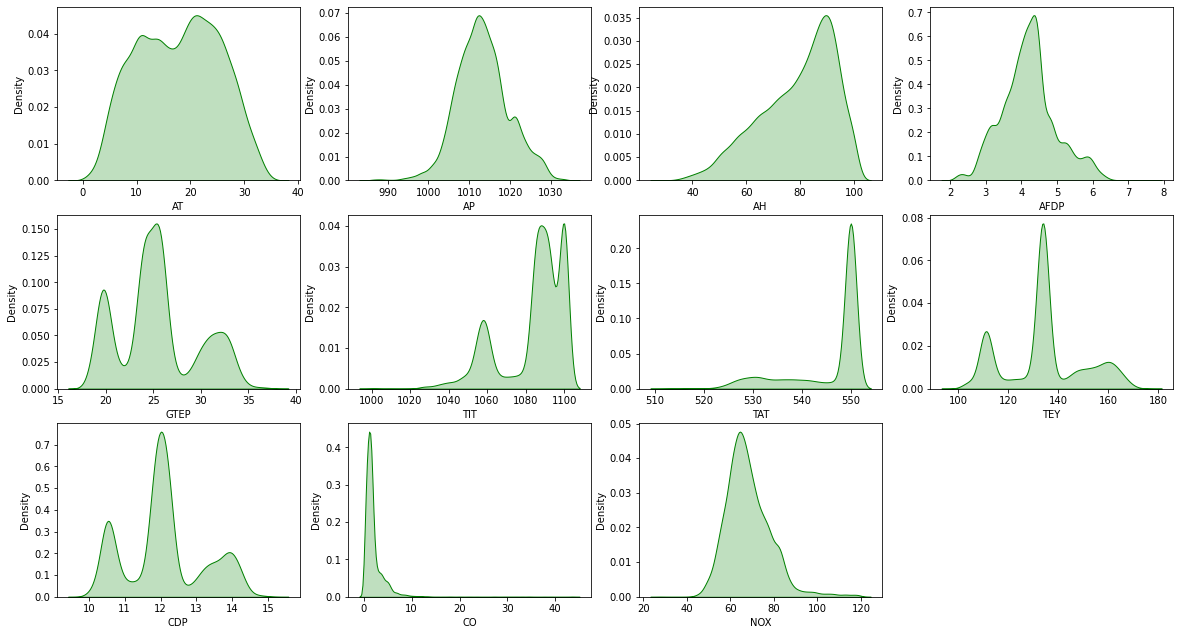

In [8]:
# KDE plot for numerical values

no_column = data.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[column],color='g',shade=True)

([<AxesSubplot:title={'center':'NOX'}>,
  <AxesSubplot:title={'center':'NOX'}>,
  Text(0.5, 1.0, 'NOX')],
 [<AxesSubplot:xlabel='NOX'>, <AxesSubplot:xlabel='NOX'>])

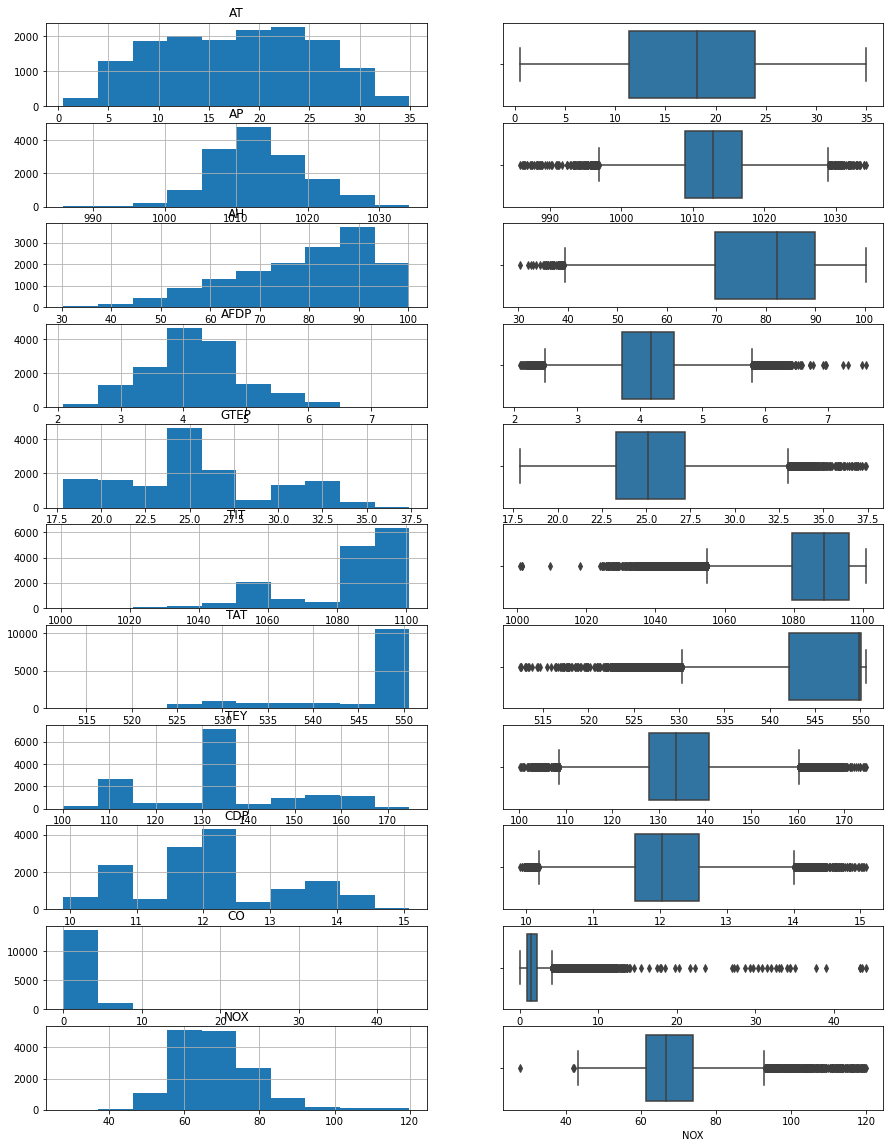

In [9]:
plt.subplots(figsize=(15,20))

[plt.subplot(11,2,1),data['AT'].hist(),plt.title("AT")],[plt.subplot(11,2,2),sns.boxplot(x=data["AT"])]
[plt.subplot(11,2,3),data['AP'].hist(),plt.title("AP")],[plt.subplot(11,2,4),sns.boxplot(x=data["AP"])]
[plt.subplot(11,2,5),data['AH'].hist(),plt.title("AH")],[plt.subplot(11,2,6),sns.boxplot(x=data["AH"])]
[plt.subplot(11,2,7),data['AFDP'].hist(),plt.title("AFDP")],[plt.subplot(11,2,8),sns.boxplot(x=data["AFDP"])]
[plt.subplot(11,2,9),data['GTEP'].hist(),plt.title("GTEP")],[plt.subplot(11,2,10),sns.boxplot(x=data["GTEP"])]

[plt.subplot(11,2,11),data['TIT'].hist(),plt.title("TIT")],[plt.subplot(11,2,12),sns.boxplot(x=data["TIT"])]

[plt.subplot(11,2,13),data['TAT'].hist(),plt.title("TAT")],[plt.subplot(11,2,14),sns.boxplot(x=data["TAT"])]

[plt.subplot(11,2,15),data['TEY'].hist(),plt.title("TEY")],[plt.subplot(11,2,16),sns.boxplot(x=data["TEY"])]

[plt.subplot(11,2,17),data['CDP'].hist(),plt.title("CDP")],[plt.subplot(11,2,18),sns.boxplot(x=data["CDP"])]

[plt.subplot(11,2,19),data['CO'].hist(),plt.title("CO")],[plt.subplot(11,2,20),sns.boxplot(x=data["CO"])]

[plt.subplot(11,2,21),data['NOX'].hist(),plt.title("NOX")],[plt.subplot(11,2,22),sns.boxplot(x=data["NOX"])]

In [10]:
x = data.iloc[:,0:12]
y = data['TEY']

In [11]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [12]:
x=x.drop(["TEY"],axis=1)

In [13]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [14]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [15]:
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

In [61]:
# creating model with ["relu" and "sigmoid"]

model = Sequential() # 0 level
model.add(Dense(25, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(25,  activation='relu')) #2nd layer
model.add(Dense(25, activation='sigmoid')) #3rd layer or op layer
model.add(Dense(25, activation='tanh')) #4rd layer or op layer
model.add(Dense(25, activation='leaky_relu')) #5rd layer or op layer

In [62]:
# Compile model

model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model

In [75]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.30, epochs=50, batch_size=30)

Epoch 1/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8408 - mean_absolute_percentage_error: 8.5818 - val_loss: 245.6631 - val_mean_absolute_percentage_error: 9.6095
Epoch 2/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8559 - mean_absolute_percentage_error: 8.6479 - val_loss: 245.4162 - val_mean_absolute_percentage_error: 9.5971
Epoch 3/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8682 - mean_absolute_percentage_error: 8.6387 - val_loss: 244.3141 - val_mean_absolute_percentage_error: 9.5407
Epoch 4/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8619 - mean_absolute_percentage_error: 8.6172 - val_loss: 244.7204 - val_mean_absolute_percentage_error: 9.5616
Epoch 5/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8709 - mean_absolute_percentage_error: 8.6291 - val_loss: 245.0496 - val_mean_absolute_percentage_error: 9.5785
Epoch 6/50
351/351 [==============================

In [76]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 251.8008 - mean_absolute_percentage_error: 8.8739
mean_absolute_percentage_error: 887.39%


In [77]:
# Visualzation of Training History, score and metric name

model.metrics_names, score ,fil_model.history.keys()

(['loss', 'mean_absolute_percentage_error'],
 [251.80081176757812, 8.873863220214844],
 dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error']))

In [78]:
fil_model.history['mean_absolute_percentage_error']  # just for understand

[8.581809997558594,
 8.647900581359863,
 8.638712882995605,
 8.617201805114746,
 8.629090309143066,
 8.598124504089355,
 8.649550437927246,
 8.598621368408203,
 8.637621879577637,
 8.612326622009277,
 8.619574546813965,
 8.649092674255371,
 8.616172790527344,
 8.651307106018066,
 8.589680671691895,
 8.629150390625,
 8.61807632446289,
 8.620222091674805,
 8.62707233428955,
 8.630577087402344,
 8.62034797668457,
 8.65604019165039,
 8.642011642456055,
 8.610390663146973,
 8.58470344543457,
 8.623364448547363,
 8.64096736907959,
 8.648178100585938,
 8.601635932922363,
 8.640883445739746,
 8.621512413024902,
 8.603336334228516,
 8.650452613830566,
 8.626450538635254,
 8.61658000946045,
 8.658136367797852,
 8.590051651000977,
 8.627413749694824,
 8.617724418640137,
 8.65416431427002,
 8.62539291381836,
 8.59873104095459,
 8.65156364440918,
 8.62774658203125,
 8.624642372131348,
 8.604636192321777,
 8.643035888671875,
 8.61938762664795,
 8.630825996398926,
 8.628039360046387]

In [79]:
fil_model.history['val_mean_absolute_percentage_error']  # just for understand

[9.60953140258789,
 9.597086906433105,
 9.540653228759766,
 9.561622619628906,
 9.578479766845703,
 9.618000984191895,
 9.567387580871582,
 9.626108169555664,
 9.588434219360352,
 9.635361671447754,
 9.657804489135742,
 9.61928653717041,
 9.623106956481934,
 9.53287124633789,
 9.664488792419434,
 9.623249053955078,
 9.668410301208496,
 9.67348575592041,
 9.702923774719238,
 9.616371154785156,
 9.62807559967041,
 9.563315391540527,
 9.527425765991211,
 9.554537773132324,
 9.677785873413086,
 9.651900291442871,
 9.64792251586914,
 9.58559799194336,
 9.674325942993164,
 9.636213302612305,
 9.63002872467041,
 9.678369522094727,
 9.61031723022461,
 9.589616775512695,
 9.61623477935791,
 9.558966636657715,
 9.582261085510254,
 9.611943244934082,
 9.675138473510742,
 9.538106918334961,
 9.566620826721191,
 9.648520469665527,
 9.558527946472168,
 9.537799835205078,
 9.5683012008667,
 9.624319076538086,
 9.602472305297852,
 9.601724624633789,
 9.61333179473877,
 9.562527656555176]

In [80]:
fil_model.history['loss']  # just for understand

[254.8408203125,
 254.8559112548828,
 254.86817932128906,
 254.86187744140625,
 254.8709259033203,
 254.88885498046875,
 254.85824584960938,
 254.87655639648438,
 254.86708068847656,
 254.85052490234375,
 254.85870361328125,
 254.87608337402344,
 254.8770751953125,
 254.83200073242188,
 254.88209533691406,
 254.86737060546875,
 254.855224609375,
 254.86148071289062,
 254.87416076660156,
 254.87954711914062,
 254.85511779785156,
 254.8499755859375,
 254.883056640625,
 254.88394165039062,
 254.84010314941406,
 254.86720275878906,
 254.86715698242188,
 254.85719299316406,
 254.86614990234375,
 254.8861541748047,
 254.85986328125,
 254.8465118408203,
 254.8833465576172,
 254.88633728027344,
 254.85064697265625,
 254.82797241210938,
 254.8974609375,
 254.8607940673828,
 254.88534545898438,
 254.84033203125,
 254.89895629882812,
 254.88461303710938,
 254.8610076904297,
 254.86422729492188,
 254.87689208984375,
 254.88299560546875,
 254.8721923828125,
 254.8756561279297,
 254.87515258789062,


In [81]:
fil_model.history['val_loss']  # just for understand

[245.66311645507812,
 245.41619873046875,
 244.31407165527344,
 244.72044372558594,
 245.04962158203125,
 245.83189392089844,
 244.8326416015625,
 245.9938201904297,
 245.2454071044922,
 246.1796875,
 246.6334228515625,
 245.85757446289062,
 245.93389892578125,
 244.16412353515625,
 246.76953125,
 245.9366912841797,
 246.84942626953125,
 246.95306396484375,
 247.55889892578125,
 245.79942321777344,
 246.0333251953125,
 244.75323486328125,
 244.05926513671875,
 244.5827178955078,
 247.04110717773438,
 246.5137939453125,
 246.43328857421875,
 245.1894989013672,
 246.97027587890625,
 246.19688415527344,
 246.07249450683594,
 247.05311584472656,
 245.6788330078125,
 245.26858520507812,
 245.79664611816406,
 244.66879272460938,
 245.12391662597656,
 245.71107482910156,
 246.98695373535156,
 244.26507568359375,
 244.81773376464844,
 246.4453125,
 244.6602325439453,
 244.25897216796875,
 244.8505401611328,
 245.9580535888672,
 245.5228271484375,
 245.50811767578125,
 245.73880004882812,
 244.

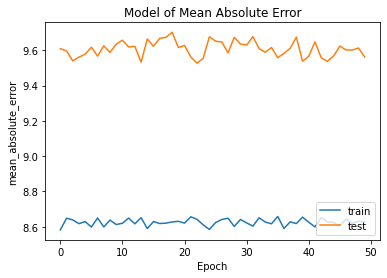

In [82]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['mean_absolute_percentage_error'])
plt.plot(fil_model.history['val_mean_absolute_percentage_error'])
plt.title('Model of Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

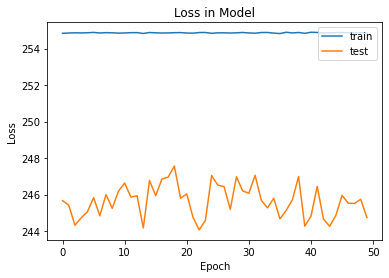

In [83]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()